# Case Study on Testing of Hypothesis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
filename="C:/Users/user/Downloads/Sales_add.csv"
df=pd.read_csv(filename)
        

In [3]:
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
df.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [5]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


# ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing

<AxesSubplot:>

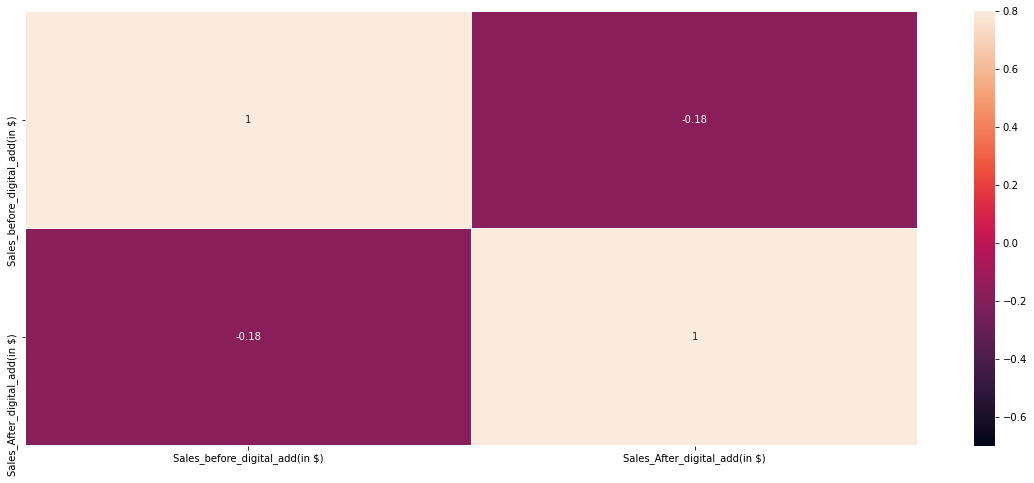

In [6]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sb.heatmap(corrmatrix,vmin=-0.7,vmax=0.8,annot=True,linewidth=0.2)

In [8]:
x=df['Sales_before_digital_add(in $)']
y=df['Sales_After_digital_add(in $)']

In [12]:
print(np.var(x), np.var(y))

210329900.67975205 623460269.4710745


Hypothesis:
Null Hypothesis: µ1 >= µ2 (Average sales before digital add is greater than or equal to that of the average sales after digital adds)

Alternative Hypothesis: µ1 < µ2 (Average sales before digital add is greater than or equal that of the average sales after digital adds)

In [13]:
import scipy.stats as stats              #to check the hypothesis, import scipy
stats.ttest_ind(x, y, equal_var=True)

Ttest_indResult(statistic=-12.995084451110877, pvalue=2.614368006904645e-16)

p value is 2.614368006904645e-16
P-Value is less than 0.05(alpha).So we reject the null hypothesis.Thereore the average sales has increased after using the digital adds.

# The company needs to check whether there is any dependency between the features “Region” and “Manager”.


H0 = There is no dependency between the features “Region” and “Manager”

H1 = There is a dependency between the features “Region” and “Manager”

In [15]:
dt=pd.crosstab(df['Region'],df['Manager'])
print(dt)

Manager     Manager - A  Manager - B  Manager - C
Region                                           
Region - A            4            3            3
Region - B            4            1            2
Region - C            1            3            1


In [16]:
val=stats.chi2_contingency(dt)
val

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [22]:

observed_values=dt.values
print('observed values are :',observed_values)

observed values are : [[4 3 3]
 [4 1 2]
 [1 3 1]]


In [17]:
expected_values=val[3]

In [19]:
no_of_rows=len(df.iloc[0:3,0])
no_of_columns=len(df.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print('Degree of freedom:',ddof)
alpha=0.05

Degree of freedom: 4


In [23]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print('chi-square statistic :',chi_square_statistic)

chi-square statistic : 2.921995464852608


In [24]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical value:',critical_value)

critical value: 9.487729036781154


In [25]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('P-value :',p_value)
print('Significance level :',alpha)
print('Degree of Freedom :',ddof)

P-value : 0.5709629929220089
Significance level : 0.05
Degree of Freedom : 4


In [26]:
if chi_square_statistic>=critical_value:
    print('Reject H0,there is a dependency between the features Region and Manager')
else:
    print('Retain H0,there is no dependency between the features Region and Manager')
if p_value<=alpha:
     print('Reject H0,there is a dependency between the features Region and Manager')
else:
    print('Retain H0,there is no dependency between the features Region and Manager')        
    

Retain H0,there is no dependency between the features Region and Manager
Retain H0,there is no dependency between the features Region and Manager
